<a href="https://colab.research.google.com/github/adigup390/deepintocnn/blob/main/Exercise5_validationscore1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2021-06-06 03:52:53--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
import torch
from torchvision import datasets, transforms
import helper
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download = True,train = True,transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,shuffle = True, batch_size = 64)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download = True,train = False,transform = transform)
testloader = torch.utils.data.DataLoader(testset,shuffle = True, batch_size = 64)


In [16]:
from torch import nn
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax(dim = 1))
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [62]:
images,labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [63]:
top_p, top_class = ps.topk(1,dim = 1)
print(top_class[:10,:])

tensor([[6],
        [7],
        [7],
        [6],
        [7],
        [6],
        [6],
        [6],
        [7],
        [7]])


In [64]:
#equals = top_class == labels.view(top_class.shape[0],top_class.shape[1])
equals = top_class == labels.view(*top_class.shape)

In [65]:
print(equals.shape)

torch.Size([64, 1])


In [66]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy : {accuracy.item()*100}")

Accuracy : 12.5


In [17]:
train_losses, test_losses = [],[]

In [20]:
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.05)
epochs = 25

In [21]:

for i in range(epochs):
  running_loss = 0
  for images, labels in iter(trainloader):
    optimizer.zero_grad()
    input = images.view(images.shape[0],-1)
    log_ps = model(input)
    loss = criterion(log_ps, labels)
    running_loss += loss
    loss.backward()
    optimizer.step()
  train_losses.append(running_loss)
  print(f"training_loss: {running_loss}")
  correct = 0
  test_running_loss = 0
  with torch.no_grad():
    for image, label in iter(testloader):
      input = image.view(image.shape[0],-1)
      output = model(input)
      _, predicted = torch.max(output,dim = 1)
      equals = predicted==label
      #print(equals.shape)
      correct += torch.sum(equals).item()
      loss = criterion(output,label)
      test_running_loss += loss
    test_losses.append(test_running_loss)
    print(f"test_loss: {test_running_loss}")
    print(f"Accuracy: {correct/10000}")

training_loss: 21.76178741455078
test_loss: 103.31669616699219
Accuracy: 0.8956
training_loss: 15.606644630432129
test_loss: 112.7665023803711
Accuracy: 0.8933
training_loss: 13.57127857208252
test_loss: 114.87779998779297
Accuracy: 0.8941
training_loss: 13.265795707702637
test_loss: 119.64803314208984
Accuracy: 0.8939
training_loss: 12.444832801818848
test_loss: 121.8359146118164
Accuracy: 0.8968
training_loss: 10.764030456542969
test_loss: 129.56002807617188
Accuracy: 0.8949
training_loss: 11.43769359588623
test_loss: 129.4817657470703
Accuracy: 0.8915
training_loss: 12.129264831542969
test_loss: 131.266357421875
Accuracy: 0.8926
training_loss: 10.30400276184082
test_loss: 138.63693237304688
Accuracy: 0.8903
training_loss: 10.950304985046387
test_loss: 142.03890991210938
Accuracy: 0.8953
training_loss: 9.637785911560059
test_loss: 137.66207885742188
Accuracy: 0.8955
training_loss: 13.177538871765137
test_loss: 140.17640686035156
Accuracy: 0.8942
training_loss: 12.328132629394531
test

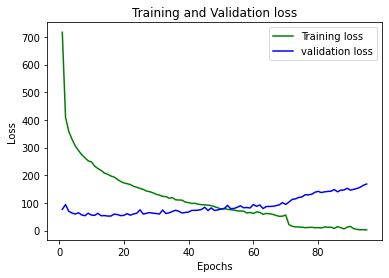

In [22]:
import matplotlib.pyplot as plt
epochs = range(1,96)
plt.plot(epochs, train_losses, 'g', label='Training loss')
plt.plot(epochs, test_losses, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()